In [1]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [2]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [3]:
columns = ['Year','Civilian Unemployment Rate']

data = [[1952,2.80],
        [1956,4.30],
        [1960,6.10],
        [1964,4.80],
        [1968,3.40],
        [1972,5.30],
        [1976,7.70],
        [1980,7.50],
        [1984,7.40],
        [1988,5.30],
        [1992,7.40],
        [1996,5.40],
        [2000,3.90],
        [2004,5.40],
        [2008,6.80],
        [2012,7.90], 
        [2016,4.70]]
        
unemployment = pd.DataFrame(data=data, columns=columns)

In [4]:
columns = ['Year','GDP Change']

data = [[1952,4.10],
        [1956,2.10],
        [1960,2.60],
        [1964,5.80],
        [1968,4.90],
        [1972,5.30],
        [1976,5.40],
        [1980,-0.30],
        [1984,7.20],
        [1988,4.20],
        [1992,3.50],
        [1996,3.80],
        [2000,4.10],
        [2004,3.80],
        [2008,-0.10],
        [2012,2.20], 
        [2016,1.60]]
        
gdp_change = pd.DataFrame(data=data, columns=columns)

In [5]:
df = votes.merge(growth).merge(unemployment).merge(gdp_change)
print(df.shape)

(17, 7)


In [6]:
df['True Incumbent'] = ((df['Incumbent Party Candidate'] == df['Incumbent Party Candidate'].shift(1)) |
                       (df['Incumbent Party Candidate'] == df['Other Candidate'].shift(1)))

df['True Incumbent'] = df['True Incumbent'].astype(int)

In [7]:
df.groupby('True Incumbent')['Incumbent Party Vote Share'].mean()

True Incumbent
0    50.347778
1    53.493750
Name: Incumbent Party Vote Share, dtype: float64

In [8]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,Civilian Unemployment Rate,GDP Change,True Incumbent
0,1952,Stevenson,Eisenhower,44.60,2.40,2.8,4.1,0
1,1956,Eisenhower,Stevenson,57.76,2.89,4.3,2.1,1
2,1960,Nixon,Kennedy,49.91,0.85,6.1,2.6,0
3,1964,Johnson,Goldwater,61.34,4.21,4.8,5.8,0
4,1968,Humphrey,Nixon,49.60,3.02,3.4,4.9,0
5,1972,Nixon,McGovern,61.79,3.62,5.3,5.3,1
6,1976,Ford,Carter,48.95,1.08,7.7,5.4,0
7,1980,Carter,Reagan,44.70,-0.39,7.5,-0.3,1
8,1984,Reagan,Mondale,59.17,3.86,7.4,7.2,1
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,5.3,4.2,0


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

features = ['Average Recent Growth in Personal Incomes',
           'Civilian Unemployment Rate',
           'GDP Change',
           'True Incumbent']
target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
model.intercept_, model.coef_

(39.7122914246162, array([ 4.02398238,  0.99202291, -0.47149499,  2.05639235]))

In [13]:
# 'combined' coefficient for the 4 features

model.predict([[1, 1, 1, 1]]) - model.predict([[0, 0, 0, 0]])

array([6.60090265])

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def plot_preds(x, y, y_pred):
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_pred')
    plt.legend
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print('MAE:', mae)
    print('r^2:', r2)

In [23]:
# %matplotlib inline
# import seaborn as sns

# y_pred = model.predict(X)
# plot_preds(x, y, y_pred)

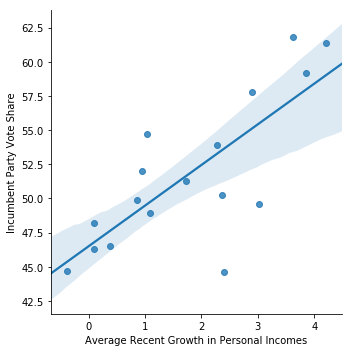

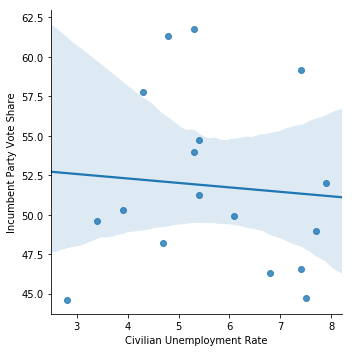

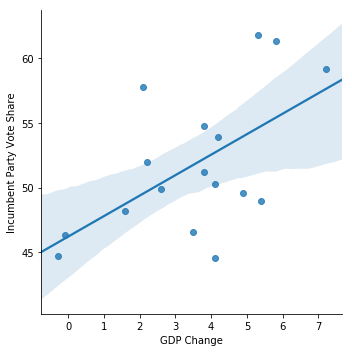

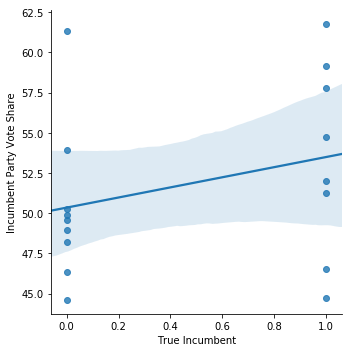

In [22]:
# plotting coefficients of my 4 features

for feature in features:
    sns.lmplot(x=feature, y=target, data=df)

In [24]:
# Test Train Split

train = df.query('Year < 2004')
test = df.query('Year >= 2004')
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13, 4), (13,), (4, 4), (4,))

In [26]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred = model.predict(X_test)
y_pred

array([52.14361904, 46.12327369, 52.72137586, 42.50919145])

In [28]:
y_test

13    51.24
14    46.32
15    52.00
16    48.20
Name: Incumbent Party Vote Share, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np
# rmse = np.sqrt(mse)

In [32]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R^2: ', r2_score(y_test, y_pred))

MSE:  8.440228432318731
RMSE:  2.9052071238241743
MAE:  1.8781324408047144
R^2:  -0.6026561659423384


In [33]:
# plotting 2 features in 3D

features = ['Civilian Unemployment Rate',
           'GDP Change']
target = 'Incumbent Party Vote Share'
X = df[features]
y = model.fit(X, y)

In [35]:
from mpl_toolkits import mplot3d

In [36]:
mplot3d?

In [50]:
def viz3d(fitted_model, df, features, target = '', num=100):
    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(),num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:, 1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='plasma')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)

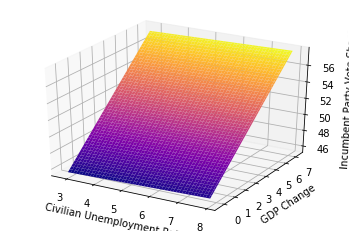

In [52]:
%matplotlib inline

viz3d(model, df, features, target)

In [55]:
# leave one out cross-validation

features = ['Average Recent Growth in Personal Incomes',
           'Civilian Unemployment Rate',
           'GDP Change',
           'True Incumbent']
target = 'Incumbent Party Vote Share'

maes = []
mses = []
rmses = []
r2s = []

for year in df['Year']:
    print(f'linreg on all years except {year}')
    model = LinearRegression()
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    
    print(f'MAE on prediction for {year} = {mae}')
    print(f'MSE on prediction for {year} = {mse}')
    print(f'RMSE on prediction for {year} = {rmse}')
    print(f'R^2 on prediction for {year} = {r2}')

linreg on all years except 1952
MAE on prediction for 1952 = 7.900395553288149
MSE on prediction for 1952 = 62.41624989841516
RMSE on prediction for 1952 = 7.900395553288149
R^2 on prediction for 1952 = 0.0
linreg on all years except 1956
MAE on prediction for 1956 = 1.9517648438147148
MSE on prediction for 1956 = 3.809386005551078
RMSE on prediction for 1956 = 1.9517648438147148
R^2 on prediction for 1956 = 0.0
linreg on all years except 1960
MAE on prediction for 1960 = 2.306173594665289
MSE on prediction for 1960 = 5.31843664873142
RMSE on prediction for 1960 = 2.306173594665289
R^2 on prediction for 1960 = 0.0
linreg on all years except 1964
MAE on prediction for 1964 = 4.126261179294886
MSE on prediction for 1964 = 17.026031319756022
RMSE on prediction for 1964 = 4.126261179294886
R^2 on prediction for 1964 = 0.0
linreg on all years except 1968
MAE on prediction for 1968 = 4.184693494110725
MSE on prediction for 1968 = 17.511659639652628
RMSE on prediction for 1968 = 4.18469349411